**Classification** problems are a broad category of machine learning problems that involve the prediction of values taken from a discrete, finite number of cases. 

In this example, we'll build a classifier to predict to which species a flower belongs to.

## Reading data

In [1]:
import pandas as pd

iris = pd.read_csv('datasets/iris.csv')

In [2]:
# Print some info and statistics about the dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal_length    150 non-null float64
Sepal_width     150 non-null float64
Petal_length    150 non-null float64
Petal_width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [3]:
iris.Class.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
iris.describe()

,Sepal_length,Sepal_width,Petal_length,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Encode the classes to numeric values
class_encodings = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

iris.Class = iris.Class.map(class_encodings)

In [6]:
iris.Class.unique()

array([0, 1, 2])

## Visualizing data

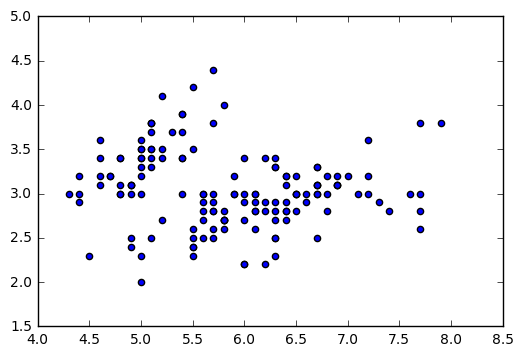

In [7]:
# Create a scatterplot for sepal length and sepal width
import matplotlib.pyplot as plt
%matplotlib inline

sl = iris.Sepal_length
sw = iris.Sepal_width

# Create a scatterplot of these two properties using plt.scatter()
# Specify labels for the X and Y axis
# Show graph
plt.scatter(sl, sw)
plt.show()

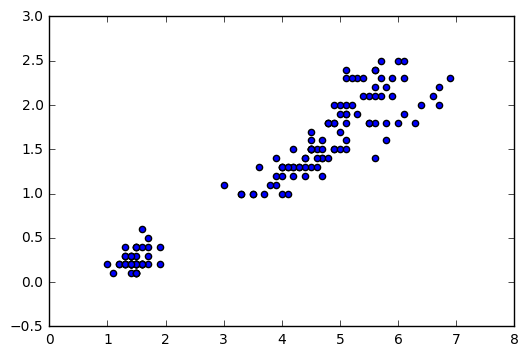

In [8]:
# Create a scatterplot for petal length and petal width
pl = iris.Petal_length
pw = iris.Petal_width

# Create a scatterplot of these two properties using plt.scatter()
# Specify labels for the X and Y axis
# Show graph
plt.scatter(pl, pw)
plt.show()

## Classifying species

We'll use [scikit-learn's LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to build out classifier.

In [9]:
X = iris.drop('Class', axis=1)
t = iris.Class.values

# Use sklean's train_test_plit() method to split our data into two sets.
from sklearn.cross_validation import train_test_split

Xtr, Xts, ytr, yts = train_test_split(X, t)

In [10]:
# Use the training set to build a LogisticRegression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(Xtr, ytr)

In [11]:
# Use the LogisticRegression's score() method to assess the model accuracy
lr.score(Xtr, ytr)

0.9642857142857143

In [12]:
# Use scikit-learn's confusion_matrix to understand which classes were misclassified.
# See http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix

confusion_matrix(ytr, lr.predict(Xtr))

array([[31,  0,  0],
       [ 0, 35,  4],
       [ 0,  0, 42]])